In [17]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Naive

In [18]:
from src.features.aggregation import naive_all_regions

dfs, vars = naive_all_regions(media_source="dereko")

  0%|          | 0/16 [00:00<?, ?it/s]

Index(['occ_ALG_lag0', 'occ_FFF_lag0', 'occ_XR_lag0', 'occ_FFFX_lag0',
       'occ_GP_lag0', 'occ_EG_lag0', 'occ_EFO_lag0',
       'occ_OTHER_CLIMATE_ORG_lag0', 'dataset_1', 'dataset_2', 'dataset_3',
       'dataset_4', 'dataset_5', 'dataset_6', 'dataset_7', 'dataset_8',
       'dataset_9', 'dataset_10', 'dataset_11', 'dataset_12', 'dataset_13',
       'dataset_14'],
      dtype='object')


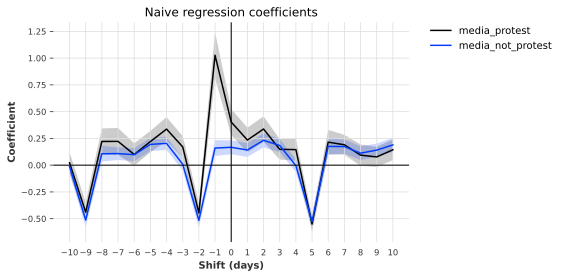

In [19]:
from pprint import pprint

from src.features.time_series.lagged_impact import lagged_impact, plot_lagged_impact
from src.paths import figures

lags = {(0, 0): vars.w}
dfs_ = [df[vars.y + vars.w] for df in dfs]
models, results = lagged_impact(dfs_, vars.y, lags)
pprint(models[0].X_lagged.columns)
plot_lagged_impact(results, "occ_FFF", "protest")
plt.savefig(figures / "regression_naive.svg")
plt.show()

Index(['weekday_Monday_lag0', 'weekday_Saturday_lag0', 'weekday_Sunday_lag0',
       'weekday_Thursday_lag0', 'weekday_Tuesday_lag0',
       'weekday_Wednesday_lag0', 'occ_ALG_lag0', 'occ_FFF_lag0', 'occ_XR_lag0',
       'occ_FFFX_lag0', 'occ_GP_lag0', 'occ_EG_lag0', 'occ_EFO_lag0',
       'occ_OTHER_CLIMATE_ORG_lag0', 'is_holiday_lag0', 'dataset_1',
       'dataset_2', 'dataset_3', 'dataset_4', 'dataset_5', 'dataset_6',
       'dataset_7', 'dataset_8', 'dataset_9', 'dataset_10', 'dataset_11',
       'dataset_12', 'dataset_13', 'dataset_14'],
      dtype='object')


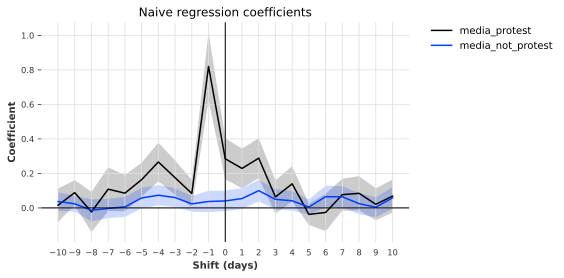

In [20]:
lags = {
    (0, 0): vars.future_only + vars.future,
}
models, results = lagged_impact(dfs, vars.y, lags)
pprint(models[0].X_lagged.columns)
plot_lagged_impact(results, "occ_FFF", "protest")
plt.show()

## With control

Index(['weekday_Monday_lag0', 'weekday_Saturday_lag0', 'weekday_Sunday_lag0',
       'weekday_Thursday_lag0', 'weekday_Tuesday_lag0',
       'weekday_Wednesday_lag0', 'occ_ALG_lag0', 'occ_FFF_lag0', 'occ_XR_lag0',
       'occ_FFFX_lag0', 'occ_GP_lag0', 'occ_EG_lag0', 'occ_EFO_lag0',
       'occ_OTHER_CLIMATE_ORG_lag0', 'is_holiday_lag0', 'occ_ALG_lag1',
       'occ_FFF_lag1', 'occ_XR_lag1', 'occ_FFFX_lag1', 'occ_GP_lag1',
       'occ_EG_lag1', 'occ_EFO_lag1', 'occ_OTHER_CLIMATE_ORG_lag1',
       'is_holiday_lag1', 'media_protest_lag1', 'media_not_protest_lag1',
       'media_framing_lag1', 'media_goal_lag1', 'media_subsidiary_goal_lag1',
       'dataset_1', 'dataset_2', 'dataset_3', 'dataset_4', 'dataset_5',
       'dataset_6', 'dataset_7', 'dataset_8', 'dataset_9', 'dataset_10',
       'dataset_11', 'dataset_12', 'dataset_13', 'dataset_14'],
      dtype='object')


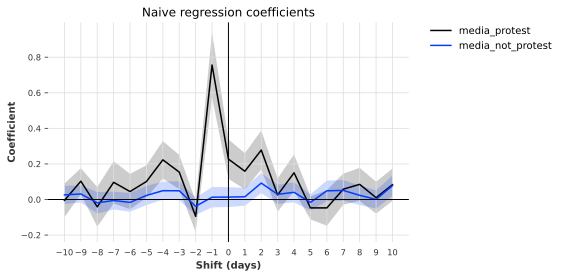

In [21]:
max_lags = 1
lags = {
    (0, 0): vars.future_only,
    (0, max_lags): vars.future,
    (1, max_lags): vars.y,
}

models, results = lagged_impact(dfs, vars.y, lags)
pprint(models[0].X_lagged.columns)
plot_lagged_impact(results, "occ_FFF", "protest")
plt.show()

If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.


Index(['weekday_Monday_lag0', 'weekday_Saturday_lag0', 'weekday_Sunday_lag0',
       'weekday_Thursday_lag0', 'weekday_Tuesday_lag0',
       'weekday_Wednesday_lag0', 'occ_ALG_lag0', 'occ_FFF_lag0', 'occ_XR_lag0',
       'occ_FFFX_lag0',
       ...
       'dataset_5', 'dataset_6', 'dataset_7', 'dataset_8', 'dataset_9',
       'dataset_10', 'dataset_11', 'dataset_12', 'dataset_13', 'dataset_14'],
      dtype='object', length=225)


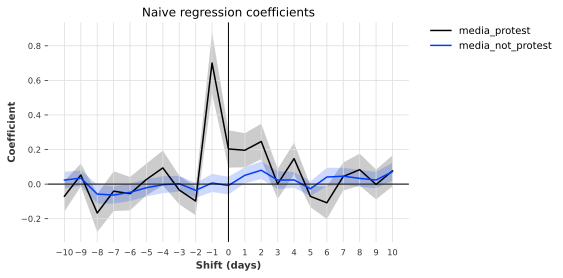

In [22]:
max_lags = 14
lags = {
    (0, 0): vars.future_only,
    (0, max_lags): vars.future,
    (1, max_lags): vars.y,
}

models, results = lagged_impact(dfs, vars.y, lags)
pprint(models[0].X_lagged.columns)
plot_lagged_impact(results, "occ_FFF", "protest")
plt.show()

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'Naive regression coefficients'}, xlabel='Shift (days)', ylabel='Coefficient'>)

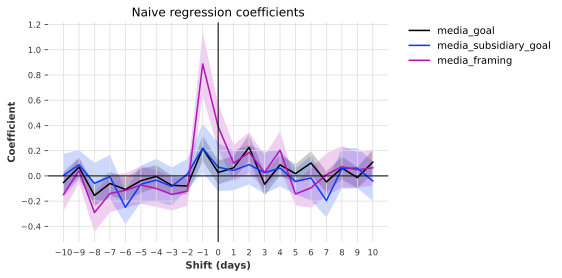

In [23]:
plot_lagged_impact(results, "occ_FFF", "goals")

In [24]:
from sklearn.linear_model import BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.multioutput import MultiOutputRegressor

from src.features.time_series import TimeSeriesRegressor

lr = LinearRegression()
lasso = MultiOutputRegressor(LassoLarsIC())
ridge = MultiOutputRegressor(BayesianRidge())

lags = {
    (0, 0): vars.future_only,
    (0, 1): vars.future,
    (1, 1): vars.y,
}
model = TimeSeriesRegressor(lr, y_cols=vars.y, lags=lags).fit_multiple(
    dfs, static_covariates="dummies"
)

### Interpretability: coefficients

In [25]:
model.get_most_important_coefficients("media_protest").head(20)

,target,predictor,lag,coef
0,media_protest,weekday_Sunday,0,-1.139301
1,media_protest,occ_EFO,0,0.983733
2,media_protest,is_holiday,0,-0.878380
3,media_protest,occ_FFF,1,0.738204
4,media_protest,occ_EFO,1,0.437980
5,media_protest,occ_FFFX,1,-0.380666
6,media_protest,weekday_Monday,0,0.344166
7,media_protest,weekday_Saturday,0,0.338615
8,media_protest,occ_ALG,1,0.336200
9,media_protest,occ_FFF,0,0.226864


## Via prediction

In [12]:
vars_w = [c for c in model.X_lagged.columns if c.startswith("occ_")]
X_lagged = model.X_lagged
y_pred = model._predict(X_lagged)
X_lagged[vars_w] = 0
y_pred_cf = model._predict(X_lagged)

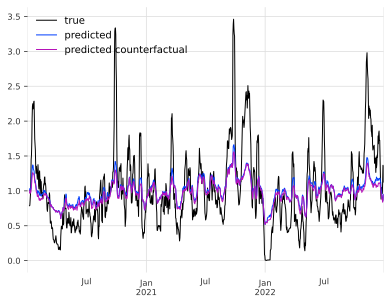

In [13]:
fig, ax = plt.subplots()
model.y.groupby(model.y.index).mean()[["media_protest"]].rolling(7).mean().plot(
    ax=ax, linewidth=1
)
y_pred.groupby(y_pred.index).mean()[["media_protest"]].rolling(7).mean().plot(
    ax=ax, linewidth=1
)
y_pred_cf.groupby(y_pred_cf.index).mean()[["media_protest"]].rolling(7).mean().plot(
    ax=ax, linewidth=1
)
plt.legend(["true", "predicted", "predicted counterfactual"])
plt.show()

In [14]:
y_pred.sum() / y_pred_cf.sum()

media_protest            1.031413
media_not_protest        0.992690
media_framing            1.019821
media_goal               1.002550
media_subsidiary_goal    1.001267
dtype: float64

In [15]:
y_pred.sum() - y_pred_cf.sum()

media_protest            467.158336
media_not_protest       -112.919082
media_framing            298.177500
media_goal                39.009960
media_subsidiary_goal     19.403374
dtype: float64

In [16]:
y_pred.sum()

media_protest            15338.566725
media_not_protest        15334.444867
media_framing            15341.809512
media_goal               15337.077694
media_subsidiary_goal    15335.689486
dtype: float64